# Prepare data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)
import numpy as np
import cPickle
import random

In [2]:
def unpickle(f):
    fo = open(f, 'rb')
    dictionary = cPickle.load(fo)
    fo.close()
    return dictionary

In [3]:
batch1 = unpickle("../data/cifar-10-batches-py/data_batch_1")
batch2 = unpickle("../data/cifar-10-batches-py/data_batch_2")
batch3 = unpickle("../data/cifar-10-batches-py/data_batch_3")
batch4 = unpickle("../data/cifar-10-batches-py/data_batch_4")
batch5 = unpickle("../data/cifar-10-batches-py/data_batch_5")
batches = [batch1, batch2, batch3, batch4, batch5]

test_batch = unpickle("../data/cifar-10-batches-py/test_batch")

In [4]:
classes = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [6]:
batch1['labels'][0], batch1['data'][0], batch1['batch_label'][0], batch1['filenames'][0]

(6,
 array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8),
 't',
 'leptodactylus_pentadactylus_s_000004.png')

In [7]:
training_images = []
training_labels = []
test_images = []
test_labels = []
for batch in batches:
    for image, label in zip(batch['data'], batch['labels']):
        training_images.append(image)
        training_labels.append(label)
training_set = [training_images, training_labels]

for image, label in zip(test_batch['data'], test_batch['labels']):
    test_images.append(image)
    test_labels.append(label)
test_set = [test_images, test_labels]

In [8]:
training_images[0][:1024]

array([ 59,  43,  50, ..., 216, 151, 123], dtype=uint8)

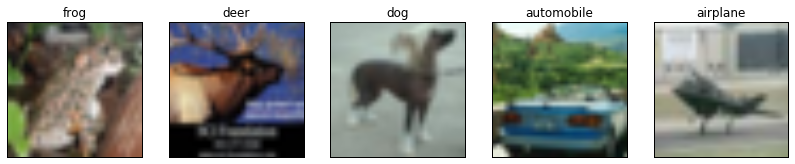

In [10]:
## See random n digit with their labels
n = 5
x = np.random.randint(0, 50000 - n)
fig = plt.figure()
for i in xrange(x,x+n):
    plt.subplot(1, n, i - x + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(classes[training_labels[i]])  ## Label
    plt.imshow(training_images[i].reshape((3, 32, 32)).transpose(1, 2, 0))